In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind

In [2]:
vanilla = pd.read_csv('per_moa_performance/level5_vanilla_moa_performance.csv')
vanilla = vanilla.assign(MOA_type = vanilla.MOA.str.split('\|').str[0].str.split(' ').str[-1])
vanilla['Vanilla VAE -log p-value'] = pd.DataFrame(- np.log(stats.norm.sf(-(vanilla['zscore']))))

beta = pd.read_csv('per_moa_performance/level5_beta_moa_performance.csv')
beta = beta.assign(MOA_type = beta.MOA.str.split('\|').str[0].str.split(' ').str[-1])
beta['Beta-VAE -log p-value'] = pd.DataFrame(- np.log(stats.norm.sf(-(beta['zscore']))))

mmd = pd.read_csv('per_moa_performance/level5_mmd_moa_performance.csv')
mmd = mmd.assign(MOA_type = mmd.MOA.str.split('\|').str[0].str.split(' ').str[-1])
mmd['MMD-VAE -log p-value'] = pd.DataFrame(- np.log(stats.norm.sf(-(mmd['zscore']))))

In [3]:
vanilla.loc[~vanilla.MOA_type.isin(['inhibitor', 'antagonist', 'agonist']), 'MOA_type'] = 'other'
beta.loc[~beta.MOA_type.isin(['inhibitor', 'antagonist', 'agonist']), 'MOA_type'] = 'other'
mmd.loc[~mmd.MOA_type.isin(['inhibitor', 'antagonist', 'agonist']), 'MOA_type'] = 'other'

In [10]:
ttest_ind(beta[beta.MOA_type == 'agonist']['Beta-VAE -log p-value'], beta[beta.MOA_type == 'inhibitor']['Beta-VAE -log p-value'])

Ttest_indResult(statistic=0.08080502734476123, pvalue=0.9358851096042216)

In [29]:
sns.set(font_scale=.5)

<AxesSubplot:xlabel='MOA_type', ylabel='MMD-VAE -log p-value'>

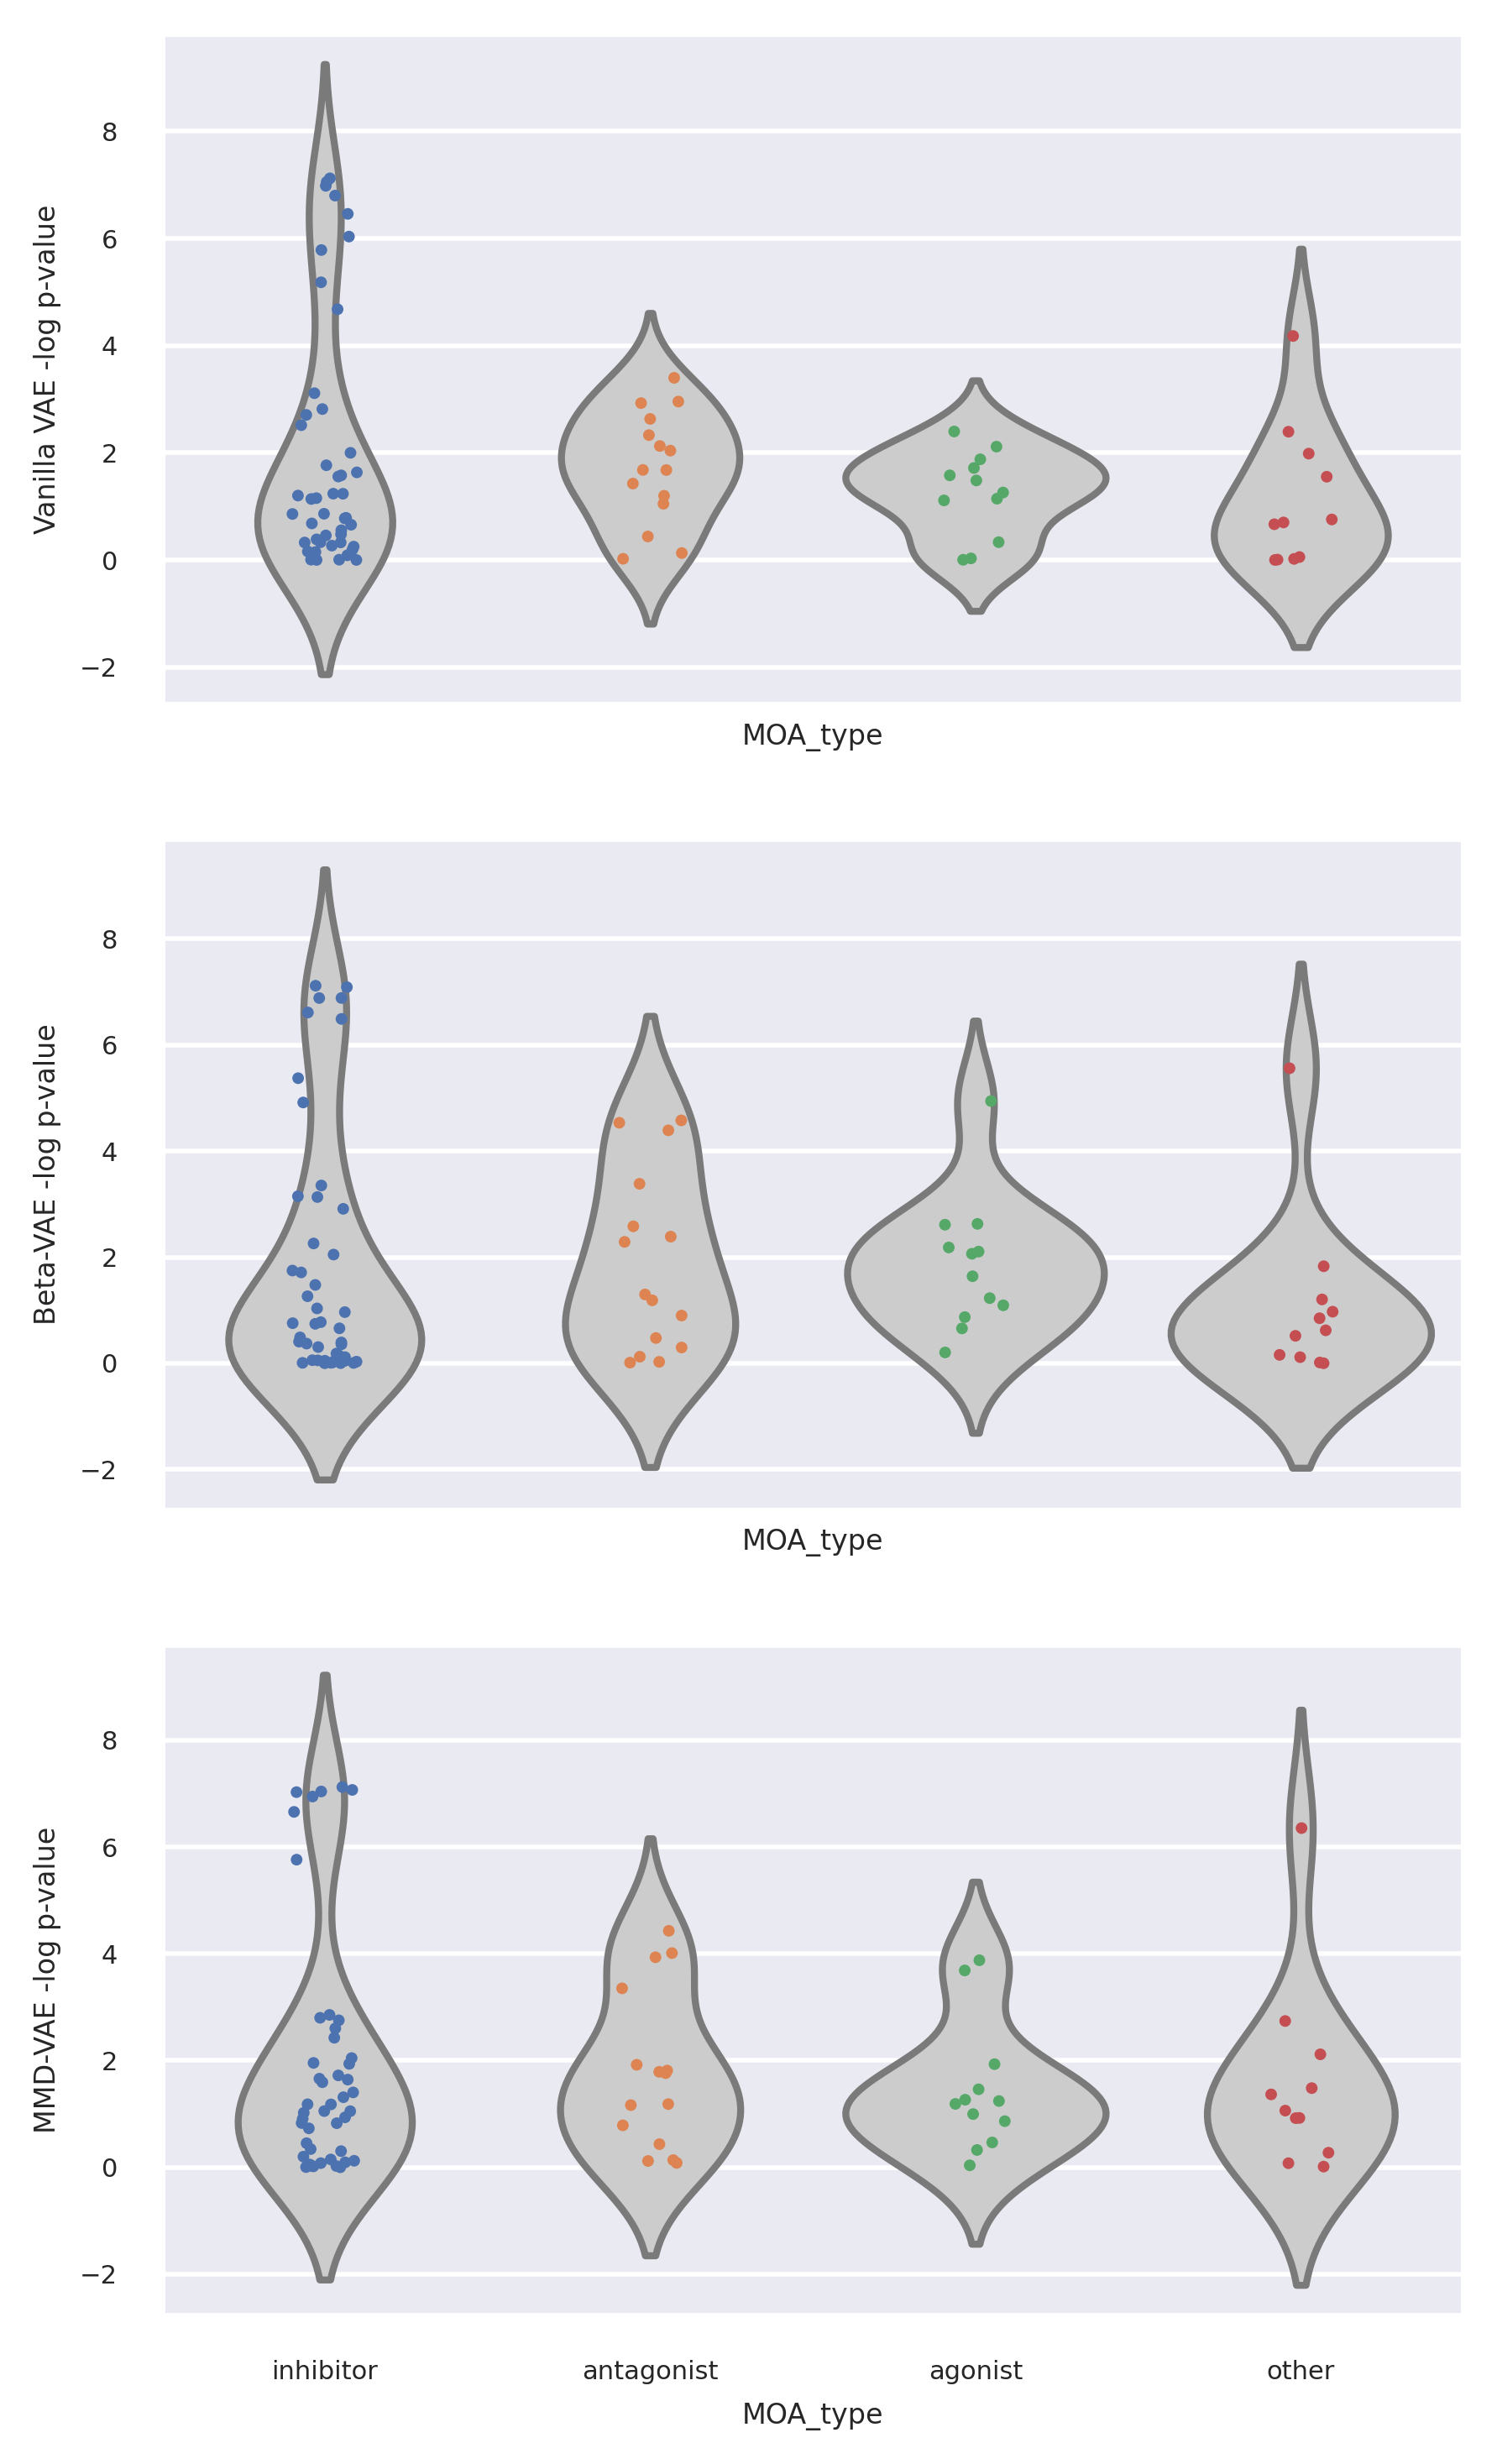

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(5,9),dpi = 400, sharex = True)
sns.violinplot(ax = ax1, x = 'MOA_type', y= 'Vanilla VAE -log p-value', data = vanilla, inner=None, color=".8", order = ['inhibitor', 'antagonist', 'agonist', 'other'])
sns.stripplot(ax = ax1, x = 'MOA_type', y= 'Vanilla VAE -log p-value', data = vanilla, marker = '.', order = ['inhibitor', 'antagonist', 'agonist', 'other'])

sns.violinplot(ax = ax2, x = 'MOA_type', y= 'Beta-VAE -log p-value', data = beta, inner=None, color=".8", order = ['inhibitor', 'antagonist', 'agonist', 'other'])
sns.stripplot(ax = ax2, x = 'MOA_type', y= 'Beta-VAE -log p-value', data = beta, marker = '.', order = ['inhibitor', 'antagonist', 'agonist', 'other'])

sns.violinplot(ax = ax3, x = 'MOA_type', y= 'MMD-VAE -log p-value', data = mmd, inner=None, color=".8", order = ['inhibitor', 'antagonist', 'agonist', 'other'])
sns.stripplot(ax = ax3, x = 'MOA_type', y= 'MMD-VAE -log p-value', data = mmd, marker = '.', order = ['inhibitor', 'antagonist', 'agonist', 'other'])